In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import yfinance as yf


In [2]:
# PRIMARY STARTING DATAFRAME
ticker = "ETH-USD"
inter = "5m" #crypto has to be every 5 minutes while stocks is 1m

df = pd.read_csv(f"{ticker}_prices_{inter}_January.csv", parse_dates=True, infer_datetime_format=True)
df = df.set_index(pd.DatetimeIndex(df['Datetime']), drop=True, append=False, inplace=False, verify_integrity=False)


In [3]:
# CLEANED/SIMPLIFIED DATAFRAME

# New dataframe for this specific technique.  Consists of OHLC only
ohlc_df = df[['Open', 'High', 'Low', 'Close']]

# slice the dataframe down to a small dataset to run the calculations very quickly
# ohlc_df = ohlc_df.iloc[2340:2350,:]
ohlc_df

,Open,High,Low,Close
Datetime,,,,
2022-01-06 00:00:00+00:00,3545.65,3545.65,3536.39,3536.39
2022-01-06 00:05:00+00:00,3536.30,3538.52,3536.30,3538.47
2022-01-06 00:10:00+00:00,3538.58,3538.91,3535.28,3538.91
2022-01-06 00:15:00+00:00,3541.70,3546.87,3541.70,3546.87
2022-01-06 00:20:00+00:00,3544.46,3544.46,3531.40,3531.40
...,...,...,...,...
2022-01-26 00:45:00+00:00,2448.03,2448.03,2437.05,2437.05
2022-01-26 00:50:00+00:00,2436.73,2436.73,2432.26,2432.26
2022-01-26 00:55:00+00:00,2429.28,2429.28,2426.58,2427.48


In [4]:
# CREATING BUY/SELL SIGNAL

# Calculate the daily returns using the closing prices and the pct_change function
ohlc_df["Actual_Returns"] = ohlc_df["Close"].pct_change()

# Creating the Signal column
ohlc_df["Signal"] = 0

# Create the Signal to buy
ohlc_df.loc[(ohlc_df["Actual_Returns"] >= 0), "Signal"] = 1

# Create the Signal to sell
ohlc_df.loc[(ohlc_df["Actual_Returns"] < 0), "Signal"] = -1

# Drop all NaN values from the DataFrame
ohlc_df = ohlc_df.dropna()


# Review the DataFrame
display(ohlc_df.head())
display(ohlc_df.tail())

/var/folders/2n/5x827bx92hj421n_qcs8qb9h0000gn/T/ipykernel_7257/278010266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_df["Actual_Returns"] = ohlc_df["Close"].pct_change()
/var/folders/2n/5x827bx92hj421n_qcs8qb9h0000gn/T/ipykernel_7257/278010266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlc_df["Signal"] = 0
/Users/brianwetzel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Open,High,Low,Close,Actual_Returns,Signal
Datetime,,,,,,
2022-01-06 00:05:00+00:00,3536.30,3538.52,3536.30,3538.47,0.000588,1
2022-01-06 00:10:00+00:00,3538.58,3538.91,3535.28,3538.91,0.000124,1
2022-01-06 00:15:00+00:00,3541.70,3546.87,3541.70,3546.87,0.002249,1
2022-01-06 00:20:00+00:00,3544.46,3544.46,3531.40,3531.40,-0.004362,-1
2022-01-06 00:25:00+00:00,3529.82,3534.06,3529.82,3534.06,0.000753,1


,Open,High,Low,Close,Actual_Returns,Signal
Datetime,,,,,,
2022-01-26 00:45:00+00:00,2448.03,2448.03,2437.05,2437.05,-0.004819,-1
2022-01-26 00:50:00+00:00,2436.73,2436.73,2432.26,2432.26,-0.001965,-1
2022-01-26 00:55:00+00:00,2429.28,2429.28,2426.58,2427.48,-0.001965,-1
2022-01-26 01:00:00+00:00,2427.53,2427.53,2427.53,2427.53,0.000021,1
2022-01-26 01:01:00+00:00,2427.45,2427.45,2427.45,2427.45,-0.000033,-1


In [26]:
ohlc_df.describe()

,Open,High,Low,Close,Actual_Returns,Signal
count,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000,5699.000000
mean,3048.765348,3050.564194,3046.845896,3048.641925,-0.000064,-0.025794
std,337.585675,337.073991,338.137270,337.629254,0.002238,0.999755
min,2172.950000,2174.150000,2172.300000,2172.730000,-0.022856,-1.000000
25%,3002.210000,3004.010000,2997.600000,3000.205000,-0.000905,-1.000000
50%,3166.810000,3168.210000,3165.870000,3166.960000,-0.000042,-1.000000
75%,3277.930000,3279.050000,3276.070000,3277.760000,0.000765,1.000000
max,3547.750000,3547.750000,3544.610000,3546.870000,0.024079,1.000000


In [5]:
# GENERATING OUR FEATURES (X) DATASET, OHLC

X = ohlc_df.iloc[:,:4]
X

,Open,High,Low,Close
Datetime,,,,
2022-01-06 00:05:00+00:00,3536.30,3538.52,3536.30,3538.47
2022-01-06 00:10:00+00:00,3538.58,3538.91,3535.28,3538.91
2022-01-06 00:15:00+00:00,3541.70,3546.87,3541.70,3546.87
2022-01-06 00:20:00+00:00,3544.46,3544.46,3531.40,3531.40
2022-01-06 00:25:00+00:00,3529.82,3534.06,3529.82,3534.06
...,...,...,...,...
2022-01-26 00:45:00+00:00,2448.03,2448.03,2437.05,2437.05
2022-01-26 00:50:00+00:00,2436.73,2436.73,2432.26,2432.26
2022-01-26 00:55:00+00:00,2429.28,2429.28,2426.58,2427.48


In [6]:
# GENERATING OUR TARGET (Y) DATASET, Signal

y = ohlc_df[['Signal']]

y.head()

,Signal
Datetime,
2022-01-06 00:05:00+00:00,1
2022-01-06 00:10:00+00:00,1
2022-01-06 00:15:00+00:00,1
2022-01-06 00:20:00+00:00,-1
2022-01-06 00:25:00+00:00,1


In [7]:
# SPLITTING OUT DATA FOR TRAINGIN AND TESTING

# Select the start of the training period
training_begin = X.index.min()

# Select the ending period for the training data with an offset 70% of the total rows
# We'll use the first 70% of the data for training.  Here one row = one minute.
seventy_pct_rows = (round(ohlc_df.shape[0]*.7)*5)
training_end = X.index.min() + DateOffset(minutes=seventy_pct_rows)

# Display the training begin and end dates
print(f'Trading Begins: {training_begin}')
print(f'Trading Ends: {training_end}')

Trading Begins: 2022-01-06 00:05:00+00:00
Trading Ends: 2022-01-19 20:30:00+00:00


In [8]:
# SETTING OUR X AND Y TRAINING & TESTING DATA

# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]



# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample X train and X test data
print('X Train Dataframe')
display(X_train.head())
print('X Test Dataframe')
display(X_test.head())
print('Y Train Dataframe')
display(y_train.head())
print('Y Test Dataframe')
display(y_test.head())

X Train Dataframe


,Open,High,Low,Close
Datetime,,,,
2022-01-06 00:05:00+00:00,3536.30,3538.52,3536.30,3538.47
2022-01-06 00:10:00+00:00,3538.58,3538.91,3535.28,3538.91
2022-01-06 00:15:00+00:00,3541.70,3546.87,3541.70,3546.87
2022-01-06 00:20:00+00:00,3544.46,3544.46,3531.40,3531.40
2022-01-06 00:25:00+00:00,3529.82,3534.06,3529.82,3534.06


X Test Dataframe


,Open,High,Low,Close
Datetime,,,,
2022-01-19 20:30:00+00:00,3127.32,3127.32,3115.90,3115.90
2022-01-19 20:35:00+00:00,3115.98,3116.47,3115.75,3116.47
2022-01-19 20:40:00+00:00,3116.25,3116.72,3116.08,3116.72
2022-01-19 20:45:00+00:00,3119.92,3119.92,3118.60,3118.96
2022-01-19 20:50:00+00:00,3117.88,3117.88,3113.83,3113.83


Y Train Dataframe


,Signal
Datetime,
2022-01-06 00:05:00+00:00,1
2022-01-06 00:10:00+00:00,1
2022-01-06 00:15:00+00:00,1
2022-01-06 00:20:00+00:00,-1
2022-01-06 00:25:00+00:00,1


Y Test Dataframe


,Signal
Datetime,
2022-01-19 20:30:00+00:00,-1
2022-01-19 20:35:00+00:00,1
2022-01-19 20:40:00+00:00,1
2022-01-19 20:45:00+00:00,1
2022-01-19 20:50:00+00:00,-1


In [9]:
# STANDARDIZING THE DATA

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# INTRODUCE THE SVM MACHINE LEARNING MODEL

# Imports
from sklearn import svm
from sklearn.metrics import classification_report

svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]


/Users/brianwetzel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [11]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)
testing_signal_predictions[:200]


array([-1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1])

In [14]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

          -1       0.57      0.99      0.72       948
           1       0.95      0.12      0.21       810

    accuracy                           0.59      1758
   macro avg       0.76      0.56      0.47      1758
weighted avg       0.75      0.59      0.49      1758



In [30]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["svm_signal"] = testing_signal_predictions

In [31]:
predictions_df.describe()

,svm_signal
count,1758.000000
mean,-0.883959
std,0.467697
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


In [35]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["svm_signal"] = testing_signal_predictions
predictions_df["actual_returns"] = ohlc_df.loc[training_end: , "Actual_Returns"]
predictions_df["trading_algorithm_returns"] = predictions_df["actual_returns"] * predictions_df["svm_signal"]
predictions_df.tail(40)

,svm_signal,actual_returns,trading_algorithm_returns
Datetime,,,
2022-01-25 19:40:00+00:00,-1,0.001357,-0.001357
2022-01-25 19:45:00+00:00,-1,0.001638,-0.001638
2022-01-25 19:50:00+00:00,-1,-0.001619,0.001619
2022-01-25 19:55:00+00:00,-1,-0.001372,0.001372
2022-01-25 20:00:00+00:00,-1,-0.003486,0.003486
2022-01-25 20:05:00+00:00,-1,-0.002838,0.002838
2022-01-25 20:10:00+00:00,-1,-0.001476,0.001476
2022-01-25 20:15:00+00:00,-1,0.000977,-0.000977
2022-01-25 20:20:00+00:00,-1,0.001855,-0.001855


<AxesSubplot:xlabel='Datetime'>

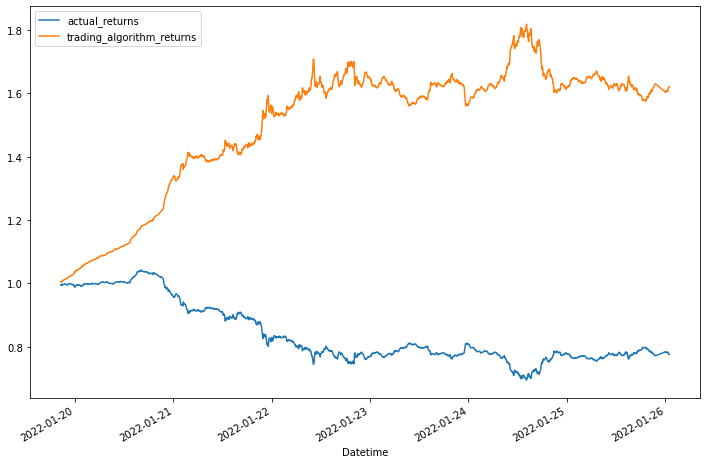

In [36]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(figsize=(12, 8))


<AxesSubplot:xlabel='Datetime'>

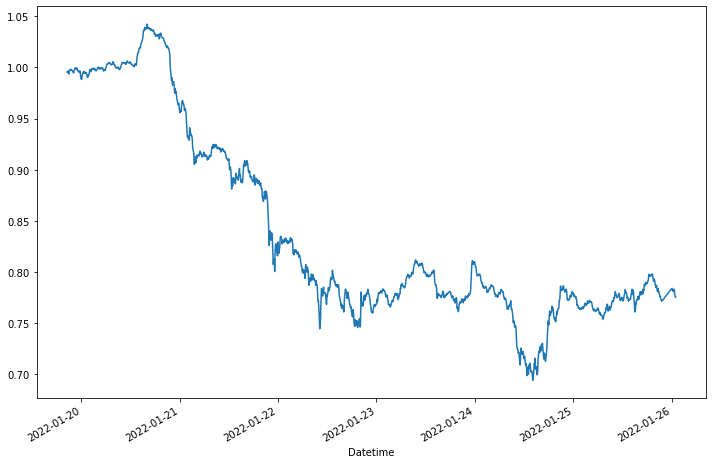

In [37]:
(1 + predictions_df['actual_returns']).cumprod().plot(figsize=(12, 8))


<AxesSubplot:xlabel='Datetime'>

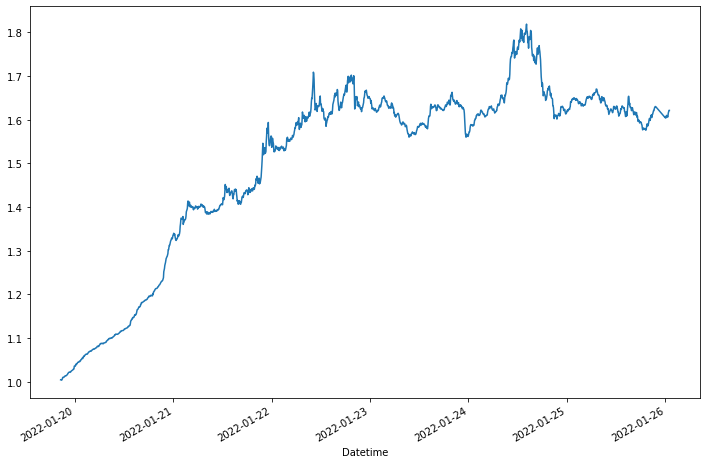

In [38]:
(1 + predictions_df['trading_algorithm_returns']).cumprod().plot(figsize=(12, 8))


In [39]:
# CREATE SVM SIGNAL TO EXPORT TO CSV
svm_signal_sf = predictions_df['svm_signal']
svm_signal_sf.to_csv("svm_signal.csv")


In [40]:
# TEST THE MODEL ON NEW DATA

# New Data
asset = "FTM-USD" #ticker symbol or crypto "BTC-USD"
inter = "5m" #stocks use 1m crypto use 5m
period = "15d" #crypto use 14d stocks 7d
timeperiod = 30
std = 1.5
new_data = yf.download(tickers={asset}, period = period, interval = inter , rounding= True)
new_data = new_data[['Open', 'High', 'Low', 'Close']]

# Calculate the daily returns using the closing prices and the pct_change function
new_data["Actual_Returns"] = new_data["Close"].pct_change()
new_data = new_data.dropna()
new_data

[*********************100%***********************]  1 of 1 completed


/var/folders/2n/5x827bx92hj421n_qcs8qb9h0000gn/T/ipykernel_7257/4239361002.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Actual_Returns"] = new_data["Close"].pct_change()


,Open,High,Low,Close,Actual_Returns
Datetime,,,,,
2022-01-14 00:05:00+00:00,2.9882,2.9903,2.9849,2.9903,-0.001469
2022-01-14 00:10:00+00:00,2.9961,2.9961,2.9803,2.9803,-0.003344
2022-01-14 00:15:00+00:00,2.9862,3.0011,2.9862,3.0011,0.006979
2022-01-14 00:20:00+00:00,3.0014,3.0014,2.9936,2.9936,-0.002499
2022-01-14 00:25:00+00:00,2.9828,2.9966,2.9828,2.9949,0.000434
...,...,...,...,...,...
2022-01-28 00:40:00+00:00,2.0689,2.0701,2.0689,2.0694,0.001888
2022-01-28 00:45:00+00:00,2.0692,2.0692,2.0674,2.0684,-0.000483
2022-01-28 00:50:00+00:00,2.0695,2.0728,2.0695,2.0728,0.002127


In [41]:
# Set X_new as our new data dataset
X_new = new_data.iloc[:,:4]

# Create a StandardScaler instance
scaler_new = StandardScaler()

# Scale the data by applying the scaler model to fit the X-new data
X_new_scaler = scaler_new.fit(X_new)
 
# Transform the X-new DataFrames using the X_scaler
X_new_scaled = X_new_scaler.transform(X_new)

# Use the trained model to predict the trading signals for the training data
new_signal_predictions = svm_model.predict(X_new_scaled)

# Display the sample predictions
new_signal_predictions[3100:]


array([-1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
        1, -1, -1,  1,  1

In [45]:
# Create a new empty predictions DataFrame using code provided below.
new_predictions_df = pd.DataFrame(index=X_new.index)
new_predictions_df["svm_signal"] = new_signal_predictions
new_predictions_df["actual_returns"] = new_data["Actual_Returns"]
new_predictions_df["trading_algorithm_returns"] = new_predictions_df["actual_returns"] * new_predictions_df["svm_signal"]

display(new_predictions_df.head())
display(new_predictions_df.tail())

,svm_signal,actual_returns,trading_algorithm_returns
Datetime,,,
2022-01-14 00:05:00+00:00,1,-0.001469,-0.001469
2022-01-14 00:10:00+00:00,1,-0.003344,-0.003344
2022-01-14 00:15:00+00:00,1,0.006979,0.006979
2022-01-14 00:20:00+00:00,1,-0.002499,-0.002499
2022-01-14 00:25:00+00:00,1,0.000434,0.000434


,svm_signal,actual_returns,trading_algorithm_returns
Datetime,,,
2022-01-28 00:40:00+00:00,-1,0.001888,-0.001888
2022-01-28 00:45:00+00:00,-1,-0.000483,0.000483
2022-01-28 00:50:00+00:00,-1,0.002127,-0.002127
2022-01-28 00:55:00+00:00,1,0.002316,0.002316
2022-01-28 00:58:00+00:00,-1,0.003466,-0.003466


<AxesSubplot:xlabel='Datetime'>

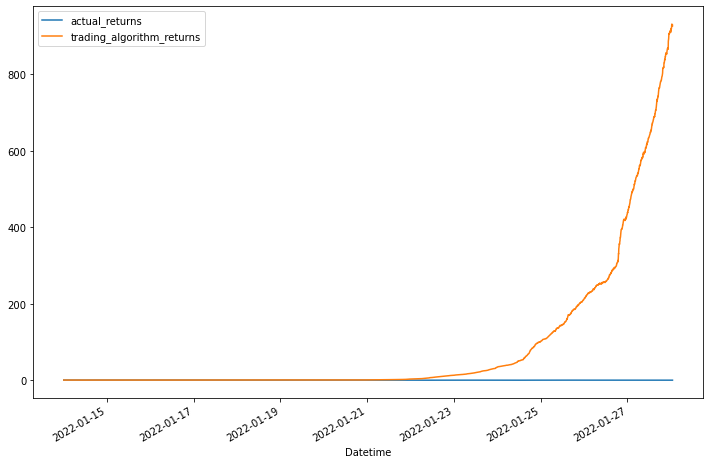

In [43]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + new_predictions_df[["actual_returns", "trading_algorithm_returns"]]).cumprod().plot(figsize=(12, 8))
